In [1]:
!pip install prophet
!pip install --upgrade prophet

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [17]:
import plotly as py

In [18]:
data = pd.read_csv('Electric_Consumption_And_Cost.csv')
data.head()

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.


,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447849 entries, 0 to 447848
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    446368 non-null  object 
 1   Borough             447849 non-null  object 
 2   Account Name        447849 non-null  object 
 3   Location            436128 non-null  object 
 4   Meter AMR           447622 non-null  object 
 5   Meter Scope         23867 non-null   object 
 6   TDS #               445111 non-null  float64
 7   EDP                 447849 non-null  int64  
 8   RC Code             447849 non-null  object 
 9   Funding Source      447849 non-null  object 
 10  AMP #               445962 non-null  object 
 11  Vendor Name         447849 non-null  object 
 12  UMIS BILL ID        447849 non-null  int64  
 13  Revenue Month       447849 non-null  object 
 14  Service Start Date  447841 non-null  object 
 15  Service End Date    447841 non-nul

In [20]:
data.shape

(447849, 27)

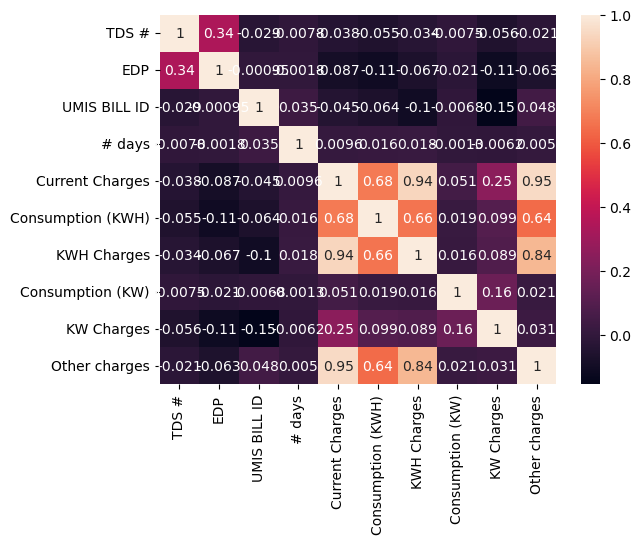

In [22]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [25]:
print(data.columns)


Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')


In [26]:
df = data[['Service Start Date', '# days', 'Service End Date', 'Consumption (KWH)']]


In [27]:
df

,Service Start Date,# days,Service End Date,Consumption (KWH)
0,12/24/2009,33.0,01/26/2010,128800.0
1,01/26/2010,30.0,02/25/2010,115200.0
2,02/25/2010,29.0,03/26/2010,103200.0
3,03/26/2010,31.0,04/26/2010,105600.0
4,04/26/2010,28.0,05/24/2010,97600.0
...,...,...,...,...
447844,12/23/2022,33.0,01/25/2023,0.0
447845,12/23/2022,33.0,01/25/2023,0.0
447846,12/23/2022,33.0,01/25/2023,82800.0
447847,12/23/2022,33.0,01/25/2023,90400.0


In [28]:
df.isnull().sum()

Service Start Date    8
# days                8
Service End Date      8
Consumption (KWH)     0
dtype: int64

In [30]:
df.dropna(inplace=True)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
df.isnull().sum()

Service Start Date    0
# days                0
Service End Date      0
Consumption (KWH)     0
dtype: int64

In [32]:
df.shape

(447841, 4)

In [33]:
#converting the date fields from object to datetime dtype
df['Serviced Start Date']= pd.to_datetime(df['Service Start Date'])
df['Service End Date'] = pd.to_datetime(df['Service End Date'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
df.dtypes

Service Start Date             object
# days                        float64
Service End Date       datetime64[ns]
Consumption (KWH)             float64
Serviced Start Date    datetime64[ns]
dtype: object

In [ ]:
#Finding outliers in #days and deleting those records from the data

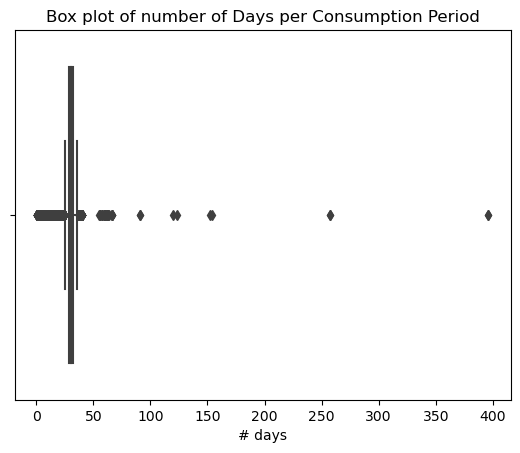

In [37]:
sns.boxplot(x=data['# days'])
plt.title('Box plot of number of Days per Consumption Period')
plt.show()


In [41]:
# Identify the rows where '# days' is less than 20 or greater than 33
outlier_rows = df[(df['# days'] == 28) | (df['# days'] == 33)].index

In [43]:
#drop these rows from the dataframe
data_cleaned = df.drop(outlier_rows)

In [ ]:
#calculate daily consumption
data_cleaned['Daily Consumption'] = data_cleaned['Consumption (KWH)'] / data_cleaned['# days']

In [45]:
#create a daily date range for each record 
data_cleaned['Date Range'] = data_cleaned.apply(lambda row: pd.date_range(row['Service Start Date'], row['Service End Date']), axis=1)

In [47]:
#explode the data frame to have a row for each day
daily_data = data_cleaned.explode('Date Range')

In [53]:
# Print columns after renaming
print(daily_data.columns)


Index(['Service Start Date', '# days', 'Service End Date', 'Consumption (KWH)',
       'Serviced Start Date', 'Date Range'],
      dtype='object')


In [54]:
# Assuming 'daily_data' is your DataFrame
daily_data['Daily Consumption'] = daily_data.apply(lambda row: row['Consumption (KWH)'] / row['# days'], axis=1)

# Rename and select relevant columns
daily_data = daily_data.rename(columns={'Date Range': 'Each Date'})[['Each Date', 'Daily Consumption']]


In [55]:
#display the new dataframe
print(daily_data)

        Each Date  Daily Consumption
1      2010-01-26        3840.000000
1      2010-01-27        3840.000000
1      2010-01-28        3840.000000
1      2010-01-29        3840.000000
1      2010-01-30        3840.000000
...           ...                ...
447842 2022-12-19        3032.258065
447842 2022-12-20        3032.258065
447842 2022-12-21        3032.258065
447842 2022-12-22        3032.258065
447842 2022-12-23        3032.258065

[12425619 rows x 2 columns]


In [56]:
daily_data['Each Date'].max()

Timestamp('2023-12-23 00:00:00')

In [57]:
daily_data['Each Date'].value_counts()

2021-01-26    13583
2020-03-25    13510
2020-02-25    13490
2020-01-24    13478
2021-02-25    10183
              ...  
2011-01-05        1
2011-01-06        1
2011-01-07        1
2011-01-08        1
2011-01-02        1
Name: Each Date, Length: 4437, dtype: int64

In [61]:
#create the daily dataset
daily_data_sum = daily_data.groupby('Each Date')['Daily Consumption'].sum()
daily_data_sum = pd.DataFrame(daily_data_sum)
daily_data_sum

,Daily Consumption
Each Date,
2009-12-17,0.970588
2009-12-18,0.970588
2009-12-19,0.970588
2009-12-20,0.970588
2009-12-21,0.970588
...,...
2023-12-19,273.000000
2023-12-20,273.000000
2023-12-21,273.000000


<AxesSubplot:xlabel='Each Date'>

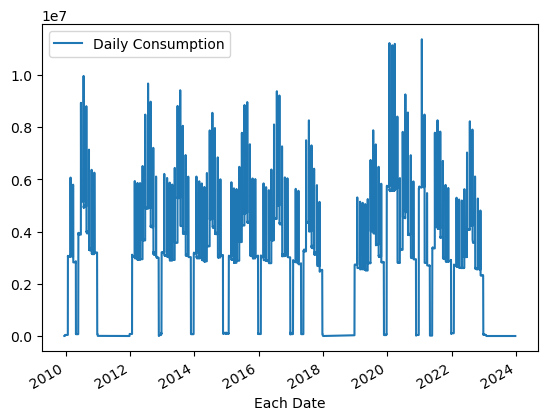

In [62]:
daily_data_sum.plot()

In [63]:
daily_data_sum.reset_index(inplace=True)

In [66]:
daily_data_sum = daily_data_sum.rename(columns={'Each Date':'Service Start Date','Daily Consumption':'Consumption(KWH)'})

In [75]:
#creating daily data set with numeric features
df = df.rename(columns={'Service Start Date':'ds','Consumption(KWH)':'y'})
df = daily_data_sum.rename(columns={'Each Date': 'Service Start Date', 'Daily Consumption':'Consumption(KWH)'})

In [77]:
df

,Service Start Date,Consumption(KWH)
0,2009-12-17,0.970588
1,2009-12-18,0.970588
2,2009-12-19,0.970588
3,2009-12-20,0.970588
4,2009-12-21,0.970588
...,...,...
4432,2023-12-19,273.000000
4433,2023-12-20,273.000000
4434,2023-12-21,273.000000
4435,2023-12-22,273.000000


In [79]:
#creating dataset for adding external factor
df_temp = daily_data_sum.rename(columns={'Each Date': 'Service Start Date','Daily Consumption':'Consumption (KWH)'})
df_temp

,Service Start Date,Consumption(KWH)
0,2009-12-17,0.970588
1,2009-12-18,0.970588
2,2009-12-19,0.970588
3,2009-12-20,0.970588
4,2009-12-21,0.970588
...,...,...
4432,2023-12-19,273.000000
4433,2023-12-20,273.000000
4434,2023-12-21,273.000000
4435,2023-12-22,273.000000


In [80]:
daily_data_sum.set_index('Service Start Date', inplace = True)

In [81]:
#creating Monthly Dataset
#group by month and calculate the sum
monthly_data = daily_data_sum.resample('M').sum()

In [84]:
#format the index to keep only the year and month
monthly_data.index = monthly_data.index.strftime('%Y-%m')

<AxesSubplot:xlabel='Service Start Date'>

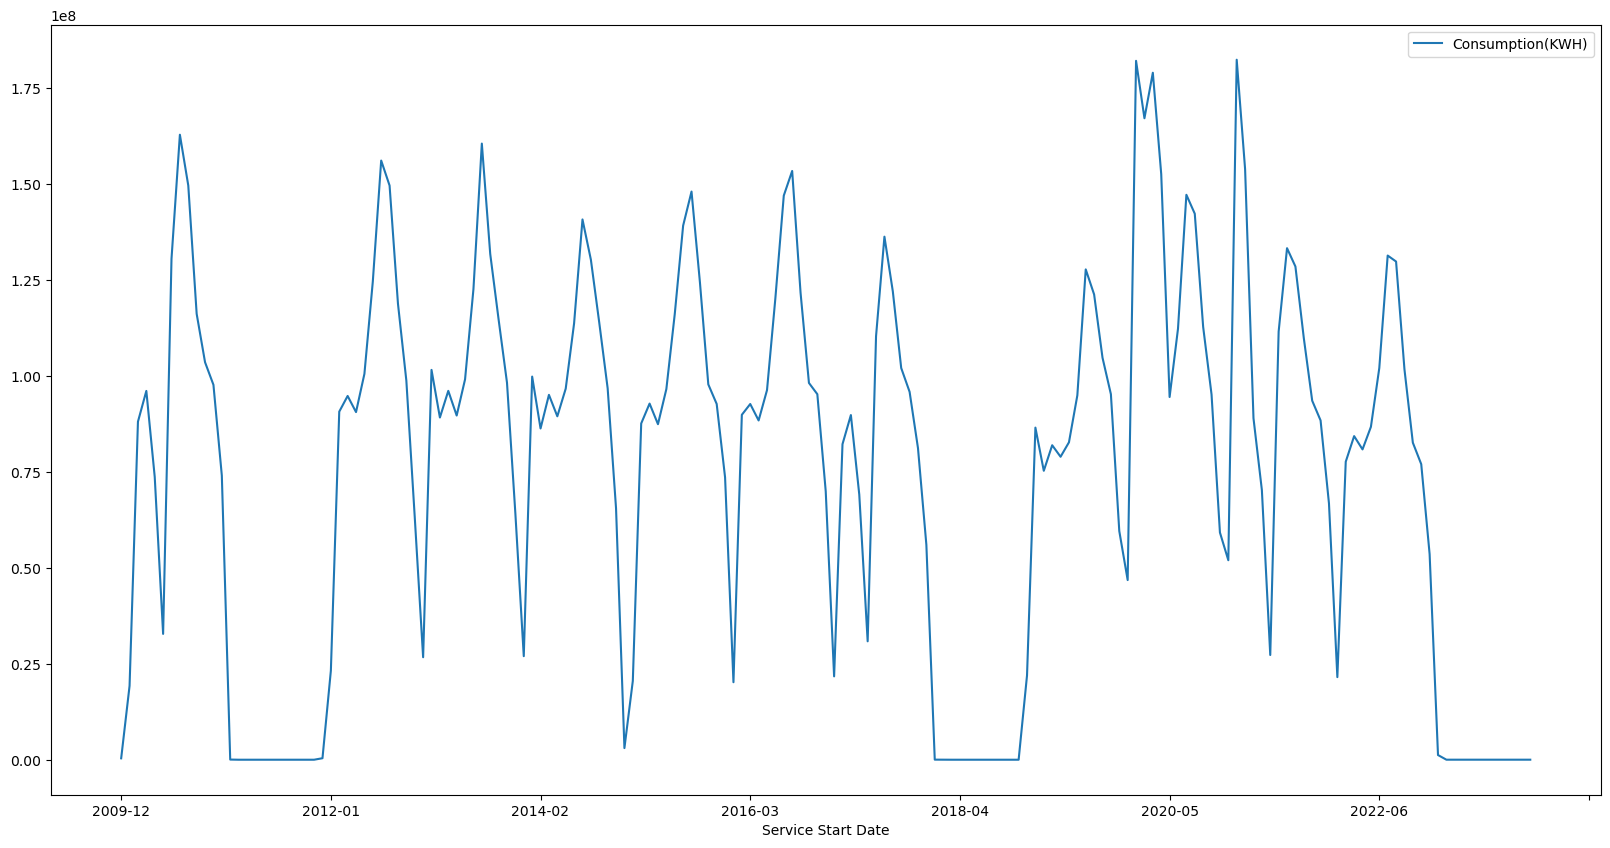

In [86]:
monthly_data.plot(figsize=(20,10))

In [87]:
monthly_data

,Consumption(KWH)
Service Start Date,
2009-12,3.621596e+05
2010-01,1.925583e+07
2010-02,8.812384e+07
2010-03,9.615110e+07
2010-04,7.372609e+07
...,...
2023-08,8.463000e+03
2023-09,8.190000e+03
2023-10,8.463000e+03


In [89]:
#creating Yearly Dataset
#group by year and calculate the sum
yearly_data = daily_data_sum.resample('Y').sum()

In [90]:
#format the index to keep only the year
yearly_data.index = yearly_data.index.strftime('%Y')

In [91]:
yearly_data

,Consumption(KWH)
Service Start Date,
2009,3.621596e+05
2010,1.144945e+09
2011,4.300726e+05
2012,1.138230e+09
2013,1.195232e+09
2014,1.131948e+09
2015,1.177361e+09
2016,1.193828e+09
2017,9.979534e+08


<AxesSubplot:xlabel='Service Start Date'>

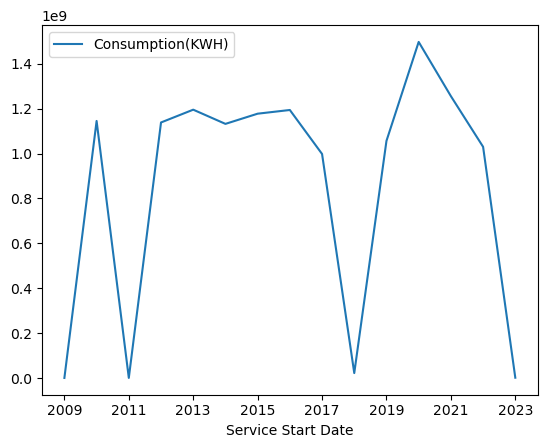

In [92]:
yearly_data.plot()

In [93]:
#training and evaluating xgbooster model with the original dataframe containing daily energy consumption
daily_data_sum

,Consumption(KWH)
Service Start Date,
2009-12-17,0.970588
2009-12-18,0.970588
2009-12-19,0.970588
2009-12-20,0.970588
2009-12-21,0.970588
...,...
2023-12-19,273.000000
2023-12-20,273.000000
2023-12-21,273.000000


In [96]:
# Display the column names
print(daily_data_sum.columns)


Index(['Consumption(KWH)'], dtype='object')


In [100]:
daily_data_sum.columns = daily_data_sum.columns.str.strip()


In [104]:
#ADDING LAG FEATURE TO SEE HOW A PREVIOUS CONSUMPTION VALUE AFFECTS THE NEXT DAY'S CONSUMPTION AS HAVING NOTHING TO CORRELATE LEADS IN A STRAIGHT LINE WITH NO CHANGE

daily_data_sum['Consumption_Lag1'] = daily_data_sum['Consumption(KWH)'].shift(1)

In [105]:
daily_data_sum

,Consumption(KWH),Consumption_Lag1
Service Start Date,,
2009-12-17,0.970588,NaN
2009-12-18,0.970588,0.970588
2009-12-19,0.970588,0.970588
2009-12-20,0.970588,0.970588
2009-12-21,0.970588,0.970588
...,...,...
2023-12-19,273.000000,273.000000
2023-12-20,273.000000,273.000000
2023-12-21,273.000000,273.000000


In [ ]:
#dropping the first row if it still contains NaN after filling

In [106]:
daily_data_sum.dropna(inplace = True)

In [ ]:
#dropping the service start date column as xgboost models dont support data types other than bool, int, float, category

In [107]:
daily_data_sum.reset_index(inplace = True)

In [109]:
daily_data_sum.drop('Service Start Date',inplace = True,axis = 1)

In [110]:
daily_data_sum

,Consumption(KWH),Consumption_Lag1
0,0.970588,0.970588
1,0.970588,0.970588
2,0.970588,0.970588
3,0.970588,0.970588
4,0.970588,0.970588
...,...,...
4431,273.000000,273.000000
4432,273.000000,273.000000
4433,273.000000,273.000000
4434,273.000000,273.000000


In [115]:
#dropping the first row if it still contains NaN after filling
daily_data_sum.dropna(inplace = True)

In [117]:
print(daily_data_sum.columns)


Index(['Consumption(KWH)', 'Consumption_Lag1'], dtype='object')


In [119]:
#dropping the service start date column as xgboost models dont support data types other than bool, int, float, category
daily_data_sum.reset_index(drop = True, inplace=True)


In [122]:
daily_data_sum

,Consumption(KWH),Consumption_Lag1
0,0.970588,0.970588
1,0.970588,0.970588
2,0.970588,0.970588
3,0.970588,0.970588
4,0.970588,0.970588
...,...,...
4431,273.000000,273.000000
4432,273.000000,273.000000
4433,273.000000,273.000000
4434,273.000000,273.000000


In [ ]:
#adding the index column

In [124]:
daily_data_sum.reset_index(inplace = True)

In [125]:
daily_data_sum

,index,Consumption(KWH),Consumption_Lag1
0,0,0.970588,0.970588
1,1,0.970588,0.970588
2,2,0.970588,0.970588
3,3,0.970588,0.970588
4,4,0.970588,0.970588
...,...,...,...
4431,4431,273.000000,273.000000
4432,4432,273.000000,273.000000
4433,4433,273.000000,273.000000
4434,4434,273.000000,273.000000


In [129]:
#define the train and test sets
train = daily_data_sum[:-3065]
test = daily_data_sum[-3065:]

X_train = train.drop('Consumption(KWH)', axis = 1)
y_train = train['Consumption(KWH)']

X_test = test.drop('Consumption(KWH)', axis = 1)
y_test = test['Consumption(KWH)']

In [ ]:
#from xgboost import regressor

In [ ]:
periods = [100,200,365]
fig.axes = plt.subplots(), 1, figsize(10,15)

for i, period in enumerate(periods):
    model = XGBRegressor(_estimators = 100)
    model.fit(x_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test[:period], predictions[:period])
    mape = np.mean(np.abs(y_test[:period] - predictions[:period]) / y_test))